### Performance depedence on the neural network hyperparameters

In [1]:
!pip install colour
!pip install seaborn

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from colour import Color

mpl.rcParams['font.size'] = 100
sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

You are using pip version 19.0.2, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.2, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


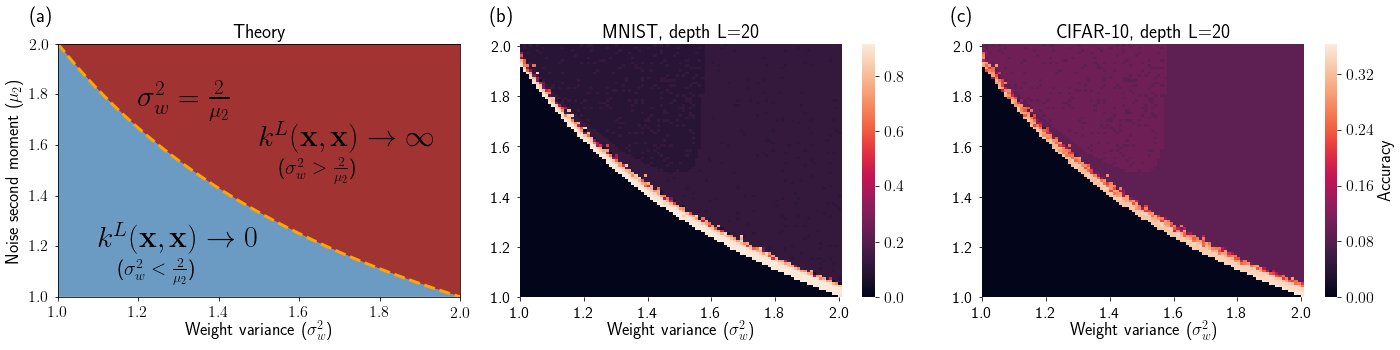

In [2]:
results_mnist = pd.read_csv("results/results20.csv", header=None)
results_cifar = pd.read_csv("results_cifar/results20.csv", header=None)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))

# Theory (left)
mu21 = np.linspace(1, 2, 100)
sigma1 = 2/mu21
ax1.plot(mu21, sigma1, c="orange", label="Variance critical boundary", linestyle='--', linewidth=3)
ax1.fill_between(mu21, 1, sigma1, facecolor='steelblue', alpha=0.8)
ax1.fill_between(mu21, 2, sigma1, facecolor='darkred', alpha=0.8)
ax1.text(1.5, 1.6, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow \infty$', fontsize=30)
ax1.text(1.55, 1.45, r'($\sigma^2_w > \frac{2}{\mu_2}$)', fontsize=20)
ax1.text(1.1, 1.2, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow 0$', fontsize=30)
ax1.text(1.15, 1.05, r'($\sigma^2_w < \frac{2}{\mu_2}$)', fontsize=20)
ax1.text(1.2, 1.7, r'$\sigma^2_w = \frac{2}{\mu_2}$', fontsize=30)
ax1.set_xlim(1, 2)
ax1.set_ylim(1, 2)
ax1.set_xlabel('Weight variance ($\sigma^2_w$)')
ax1.set_ylabel('Noise second moment ($\mu_2$)')
ax1.set_title('Theory')


# MNIST (middle)
sns.heatmap(results_mnist.pivot(4, 2, 7), ax=ax2, rasterized=True)
ax2.invert_yaxis()
ax2.set_title("MNIST, depth L=20")
ax2.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax2.set_ylabel("")
ax2.set_yticks([],[])
ax2.set_xticks([],[])
ax2.set_yticks(np.linspace(0, 100, 6))
ax2.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax2.set_xticks(np.linspace(0, 100, 6))
ax2.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal')

# cifar-10 (right)
sns.heatmap(results_cifar.pivot(4, 2, 7), cbar_kws={'label':"Accuracy"}, ax=ax3, rasterized=True)
ax3.invert_yaxis()
ax3.set_title("CIFAR-10, depth L=20")
ax3.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax3.set_ylabel('')
ax3.set_yticks([],[])
ax3.set_xticks([],[])
ax3.set_yticks(np.linspace(0, 100, 6))
ax3.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax3.set_xticks(np.linspace(0, 100, 6))
ax3.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 

fig.text(0.03, 0.95, "(a)", fontsize=20)
fig.text(0.35, 0.95, "(b)", fontsize=20)
fig.text(0.67, 0.95, "(c)", fontsize=20)

plt.gcf().tight_layout()
plt.show()
#plt.savefig("fig1.png", dpi=80)

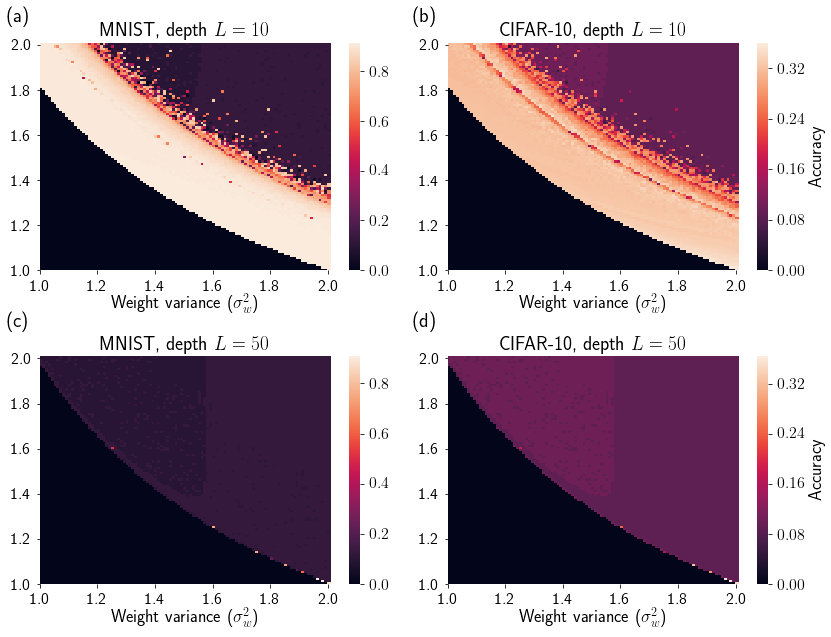

In [3]:
results_mnist_10 = pd.read_csv("results/results10.csv", header=None)
results_cifar_10 = pd.read_csv("results_cifar/results10.csv", header=None)
results_mnist_50 = pd.read_csv("results/results50.csv", header=None)
results_cifar_50 = pd.read_csv("results_cifar/results50.csv", header=None)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 9))

# Theory (left)
# mu21 = np.linspace(1, 2, 100)
# sigma1 = 2/mu21
# ax1.plot(mu21, sigma1, c="orange", label="Variance critical boundary", linestyle='--', linewidth=3)
# ax1.fill_between(mu21, 1, sigma1, facecolor='steelblue', alpha=0.8)
# ax1.fill_between(mu21, 2, sigma1, facecolor='darkred', alpha=0.8)
# ax1.text(1.5, 1.6, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow \infty$', fontsize=25)
# ax1.text(1.55, 1.5, r'($\sigma^2_w > \frac{2}{\mu_2}$)', fontsize=15)
# ax1.text(1.1, 1.2, r'$k^L(\mathbf{x}, \mathbf{x}) \rightarrow 0$', fontsize=25)
# ax1.text(1.15, 1.1, r'($\sigma^2_w < \frac{2}{\mu_2}$)', fontsize=15)
# ax1.text(1.2, 1.7, r'$\sigma^2_w = \frac{2}{\mu_2}$', fontsize=18)
# ax1.set_xlim(1, 2)
# ax1.set_ylim(1, 2)
# ax1.set_xlabel('Weight variance ($\sigma^2_w$)')
# ax1.set_ylabel('Noise second moment ($\mu_2$)')
# ax1.set_title('Theory')


# MNIST 10 layers
sns.heatmap(results_mnist_10.pivot(4, 2, 7), ax=ax1, rasterized=True)
ax1.invert_yaxis()
ax1.set_title(r"MNIST, depth $L=10$")
ax1.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax1.set_ylabel("")
ax1.set_yticks([],[])
ax1.set_xticks([],[])
ax1.set_yticks(np.linspace(0, 100, 6))
ax1.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax1.set_xticks(np.linspace(0, 100, 6))
ax1.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal')

# cifar 10 layers
sns.heatmap(results_cifar_10.pivot(4, 2, 7), cbar_kws={'label':"Accuracy"}, ax=ax2, rasterized=True)
ax2.invert_yaxis()
ax2.set_title(r"CIFAR-10, depth $L=10$")
ax2.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax2.set_ylabel('')
ax2.set_yticks([],[])
ax2.set_xticks([],[])
ax2.set_yticks(np.linspace(0, 100, 6))
ax2.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax2.set_xticks(np.linspace(0, 100, 6))
ax2.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 

# MNIST 50 layers
sns.heatmap(results_mnist_50.pivot(4, 2, 7), ax=ax3, rasterized=True)
ax3.invert_yaxis()
ax3.set_title(r"MNIST, depth $L=50$")
ax3.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax3.set_ylabel("")
ax3.set_yticks([],[])
ax3.set_xticks([],[])
ax3.set_yticks(np.linspace(0, 100, 6))
ax3.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax3.set_xticks(np.linspace(0, 100, 6))
ax3.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal')

# cifar 50 layers
sns.heatmap(results_cifar_50.pivot(4, 2, 7), cbar_kws={'label':"Accuracy"}, ax=ax4, rasterized=True)
ax4.invert_yaxis()
ax4.set_title(r"CIFAR-10, depth $L=50$")
ax4.set_xlabel(r"Weight variance ($\sigma^2_w$)")
ax4.set_ylabel('')
ax4.set_yticks([],[])
ax4.set_xticks([],[])
ax4.set_yticks(np.linspace(0, 100, 6))
ax4.set_yticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 
ax4.set_xticks(np.linspace(0, 100, 6))
ax4.set_xticklabels(['1.0', '1.2', '1.4', '1.6', '1.8', '2.0'], rotation='horizontal') 

fig.text(0.02, 0.97, "(a)", fontsize=20)
fig.text(0.49, 0.97, "(b)", fontsize=20)
fig.text(0.02, 0.5, "(c)", fontsize=20)
fig.text(0.49, 0.5, "(d)", fontsize=20)

plt.gcf().tight_layout()
plt.show()
#plt.savefig("fig4.png", dpi=80)

### Effect of noise on uncertainty estimation and kernel norm

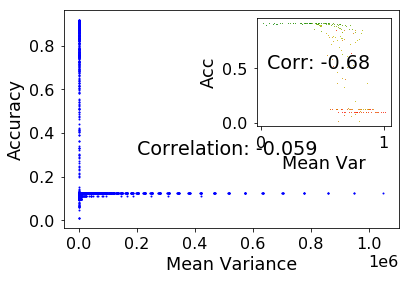

In [4]:
results = pd.read_csv("results/results20.csv", header=None)
var = np.array(results[8])
accs = np.array(results[7])
weight_var = np.array(results[2])
mu_2 = np.array(results[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 

# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

fig, ax = plt.subplots()
inset_axes = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax.plot(var, acc, 'ro', c='blue', markersize=2)
ax.set_xlabel('Mean Variance')
ax.set_ylabel('Accuracy')
ax.text(200000, 0.3, 'Correlation: %1.3f' % corr)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    #inset_axes.plot(var_crit, acc_crit, 'ro', c='darkgreen', markersize=2)
    if len(str(c)) > 5:
        inset_axes.plot(v, a, 'ro', c=str(c), markersize=1)
inset_axes.text(0.05,0.5, 'Corr: %1.2f' % corr)
inset_axes.set_ylabel('Acc')
inset_axes.set_xlabel('Mean Var')
plt.show()

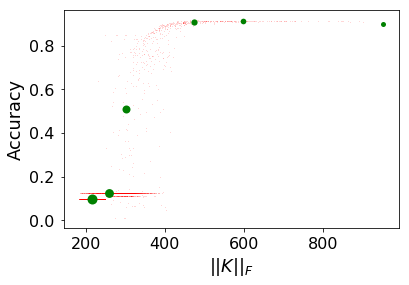

In [5]:
norm = np.array(results[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
plt.plot(n[diff > eps], acc[diff > eps], 'ro', c="red", markersize=1, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    plt.plot(no, a, 'ro', c="green", markersize=5*m)
plt.xlabel(r'$||K||_F$')
plt.ylabel("Accuracy")
plt.show()

### Compute evolution of kernel function for diagonal and off-diagonal elements of K

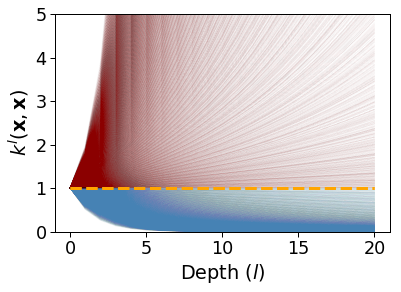

In [120]:
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            plt.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            plt.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        
        if 0.5*w*m == 1.0:
            col = 'orange'
            alpha=1
            lw=3
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            plt.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
plt.ylim(0, 5)
plt.xlabel(r'Depth ($l$)')
plt.ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')
plt.show()

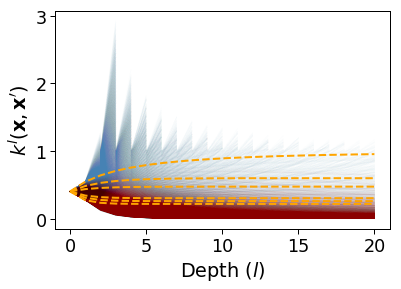

In [121]:
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            plt.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            plt.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if np.abs(w - 2/m) < eps:
            col = 'orange'
            alpha=1
            lw=2
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            plt.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
plt.xlabel(r'Depth ($l$)')
plt.ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')
plt.show()

### Combined plots

1.6
1.25


/home/canyon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


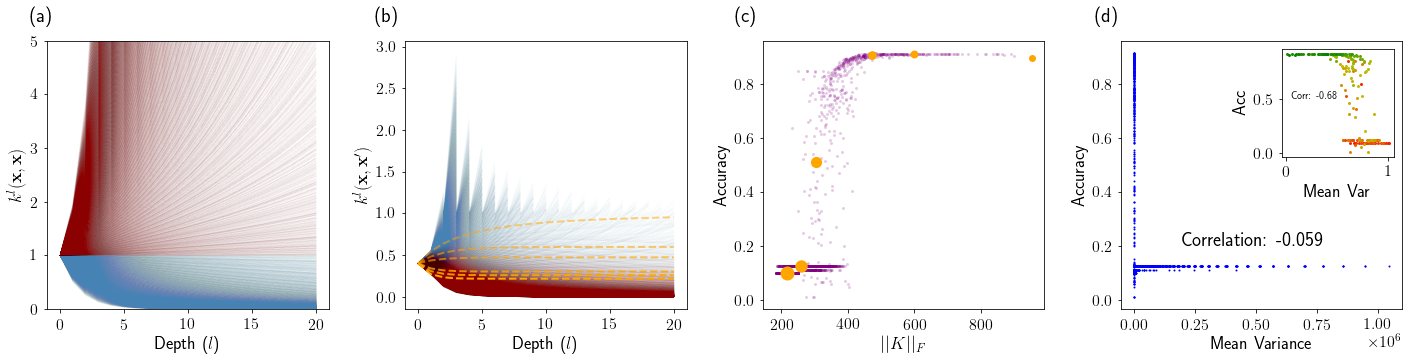

In [5]:
results_mnist = pd.read_csv("results/results20.csv", header=None)

var = np.array(results_mnist[8])
accs = np.array(results_mnist[7])
weight_var = np.array(results_mnist[2])
mu_2 = np.array(results_mnist[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 

#fig, [[ax2, ax3, ax1, ax4], [ax6, ax7, ax5, ax8]] = plt.subplots(2, 4, figsize=(20, 10))
fig, [ax2, ax3, ax1, ax4] = plt.subplots(1, 4, figsize=(20, 5))

# TOP 1
norm = np.array(results_mnist[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
ax1.plot(n[diff > eps], acc[diff > eps], 'ro', c="purple", markersize=3, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    ax1.plot(no, a, 'ro', c="orange", markersize=7*m)
ax1.set_xlabel(r'$||K||_F$')
ax1.set_ylabel("Accuracy")

# TOP 2
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax2.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax2.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)   
        if 0.5*w*m == 1.0:
            col = 'orange'
            print(m)
            alpha=m/1000
            lw=3
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results/vars/20_' + load_string, encoding='latin1')
            ax2.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax2.set_ylim(0, 5)
ax2.set_xlabel(r'Depth ($l$)')
ax2.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')

# TOP 3
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax3.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax3.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)       
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if np.abs(w - 2/m) < eps:
            col = 'orange'
            alpha=m/2
            lw=2
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results/corrs/20_' + load_string, encoding='latin1')
            ax3.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax3.set_xlabel(r'Depth ($l$)')
ax3.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')

# TOP 4
# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

in_axes = inset_axes(ax4,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax4.plot(var, acc, 'ro', c='blue', markersize=2)
ax4.set_xlabel('Mean Variance')
ax4.set_ylabel('Accuracy')
ax4.text(200000, 0.2, 'Correlation: %1.3f' % corr)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    if len(str(c)) > 5:
        in_axes.plot(v, a, 'ro', c=str(c), markersize=3)
in_axes.text(0.05,0.5, 'Corr: %1.2f' % corr, size=10)
in_axes.set_ylabel('Acc')
in_axes.set_xlabel('Mean Var')

fig.text(0.03, 0.98, "(a)", fontsize=20)
fig.text(0.27, 0.98, "(b)", fontsize=20)
fig.text(0.52, 0.98, "(c)", fontsize=20)
fig.text(0.77, 0.98, "(d)", fontsize=20)

plt.gcf().tight_layout()
#plt.savefig("fig2.png", dpi=80)
plt.show()

/home/canyon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


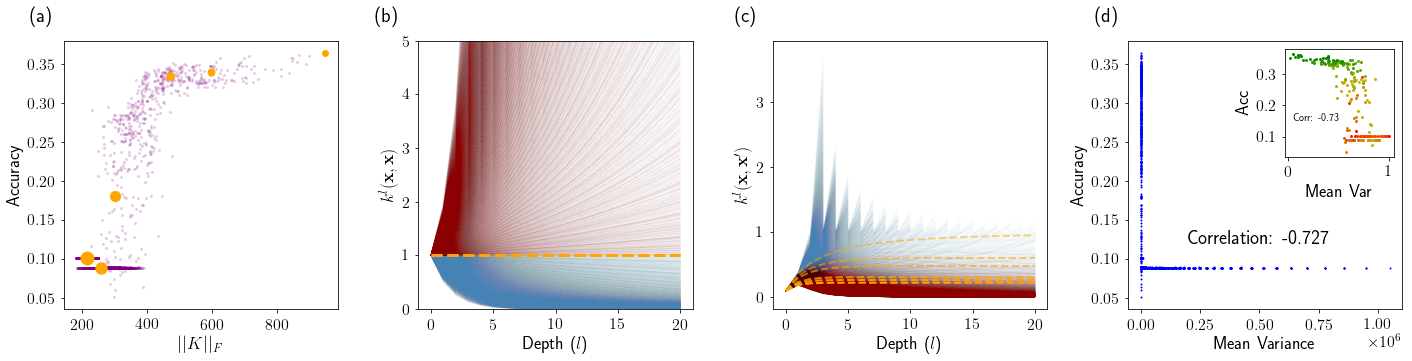

In [5]:
results_cifar = pd.read_csv("results_cifar/results20.csv", header=None)

var = np.array(results_cifar[8])
accs = np.array(results_cifar[7])
weight_var = np.array(results_cifar[2])
mu_2 = np.array(results_cifar[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 


fig, [ax5, ax6, ax7, ax8] = plt.subplots(1, 4, figsize=(20, 5))

# BOTTOM 1
norm = np.array(results_cifar[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
ax5.plot(n[diff > eps], acc[diff > eps], 'ro', c="purple", markersize=3, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    ax5.plot(no, a, 'ro', c="orange", markersize=7*m)
ax5.set_xlabel(r'$||K||_F$')
ax5.set_ylabel("Accuracy")

# BOTTOM 2
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax6.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax6.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)   
        if 0.5*w*m == 1.0:
            col = 'orange'
            alpha=1
            lw=3
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            qs = np.load('results_cifar/vars/20_' + load_string, encoding='latin1')
            ax6.plot(qs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax6.set_ylim(0, 5)
ax6.set_xlabel(r'Depth ($l$)')
ax6.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')

# BOTTOM 3
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'darkred'
            alpha = 0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax7.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'steelblue'
            alpha=0.01
            lw=1
            ls='-'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax7.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)       
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if np.abs(w - 2/m) < eps:
            col = 'orange'
            alpha=m/2
            lw=2
            ls='--'
            load_string = str(w) + "_" + str(m) + ".npy"
            cs = np.load('results_cifar/corrs/20_' + load_string, encoding='latin1')
            ax7.plot(cs, c=col, alpha=alpha, linewidth=lw, ls=ls)
ax7.set_xlabel(r'Depth ($l$)')
ax7.set_ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')

# BOTTOM 4
# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

in_axes = inset_axes(ax8,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax8.plot(var, acc, 'ro', c='blue', markersize=2)
ax8.set_xlabel('Mean Variance')
ax8.set_ylabel('Accuracy')
ax8.text(200000, 0.12, 'Correlation: %1.3f' % corr)
ax8.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    if len(str(c)) > 5:
        in_axes.plot(v, a, 'ro', c=str(c), markersize=3)
in_axes.text(0.05,0.15, 'Corr: %1.2f' % corr, size=10)
in_axes.set_ylabel('Acc')
in_axes.set_xlabel('Mean Var')

# fig.text(0.03, 0.5, "(e)", fontsize=20)
# fig.text(0.27, 0.5, "(f)", fontsize=20)
# fig.text(0.52, 0.5, "(g)", fontsize=20)
# fig.text(0.77, 0.5, "(h)", fontsize=20)

fig.text(0.03, 0.98, "(a)", fontsize=20)
fig.text(0.27, 0.98, "(b)", fontsize=20)
fig.text(0.52, 0.98, "(c)", fontsize=20)
fig.text(0.77, 0.98, "(d)", fontsize=20)

plt.gcf().tight_layout()
#plt.savefig("fig2.png", dpi=80)
plt.show()